## Домашнее задание 9
### Градиентный бустинг

В данном домашнем задании мы изучим применение градиентного бустинга для решения реальных задач.
  
Мы будем использовать данные об аренде квартир сервиса Яндекс.Недвижимость: по информации из объявления предсказывать время его экспозиции на сервисе.  

Для измерения качества моделей в данном задании будем использовать среднюю абсолютную ошибку (MAE).

In [1]:
import pandas as pd
import numpy as np
import catboost
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('data.tsv', sep='\t')
data = data[:100_000]
num_features = ['agent_fee', 'floor', 'floors_total', 'kitchen_area', 'living_area', 'price', 'rooms_offered', 'total_area', 'total_images']
cat_features = ['balcony', 'building_type', 'month', 'renovation', 'studio']

X_train, X_test, y_train, y_test = train_test_split(data[num_features+cat_features], data['exposition_time'], test_size=0.3, shuffle=False)

__Задание 1.__

В этом задании вам предстоит сравнить базовые версии (без подбора параметров) двух реализаций градиентного бустинга.

Обучите LightGBM и Catboost на **вещественных** признаках без подбора параметров, но с 300 деревьями. Здесь и во всей работе далее обязательно используйте только 300 деревьев для ускорения. Сделайте предсказания для тестовой выборки, посчитайте MAE. Выведите модуль разности между значениями метрик LightGBM и Catboost. Ответ округлите до 4 знаков после запятой.

В этом и последующих экспериментах советуем измерять время обучения моделей. Для того чтобы замерить время работы ячейки вначале ячейки укажите отдельной строкой ```%%time``` (в этом задании обучение модели может занимать 2-5 минут).


In [2]:
X_train, X_test, y_train, y_test = train_test_split(data[num_features], data['exposition_time'], test_size=0.3, shuffle=False)


cat_regr = catboost.CatBoostRegressor(n_estimators=300)#, cat_features=cat_features)
cat_regr.fit(X_train, y_train)
pred = cat_regr.predict(X_test)
cat_mae = mean_absolute_error(y_test, pred)

light_regr = lightgbm.LGBMRegressor(n_estimators=300)
light_regr.fit(X_train, y_train)
pred_light = light_regr.predict(X_test)
light_mae = mean_absolute_error(y_test, pred_light)
print(round(cat_mae - light_mae, 4))  # 0.2494

answer = round(cat_mae - light_mae, 4) # модуль разности между значениями метрик LightGBM и Catboost, округление до 4 знаков после запятой


Learning rate set to 0.213209
0:	learn: 75.7477412	total: 143ms	remaining: 42.8s
1:	learn: 75.3848343	total: 148ms	remaining: 22s
2:	learn: 75.1219333	total: 153ms	remaining: 15.1s
3:	learn: 74.9962405	total: 157ms	remaining: 11.6s
4:	learn: 74.8677196	total: 162ms	remaining: 9.58s
5:	learn: 74.7764668	total: 167ms	remaining: 8.18s
6:	learn: 74.7089984	total: 172ms	remaining: 7.19s
7:	learn: 74.6545760	total: 177ms	remaining: 6.47s
8:	learn: 74.6013355	total: 182ms	remaining: 5.88s
9:	learn: 74.5587082	total: 187ms	remaining: 5.43s
10:	learn: 74.5110464	total: 193ms	remaining: 5.07s
11:	learn: 74.4803030	total: 198ms	remaining: 4.76s
12:	learn: 74.4427033	total: 203ms	remaining: 4.48s
13:	learn: 74.4052806	total: 208ms	remaining: 4.24s
14:	learn: 74.3876387	total: 214ms	remaining: 4.06s
15:	learn: 74.3711255	total: 218ms	remaining: 3.88s
16:	learn: 74.3443614	total: 223ms	remaining: 3.71s
17:	learn: 74.3149924	total: 228ms	remaining: 3.58s
18:	learn: 74.2703821	total: 234ms	remaining: 

Если время работы более 30 секунд, то **закомментируйте код и для сдачи ноутбука** оставьте только ответ вида ```answer = x.xxxx```

__Задание 2.__

Далее будем использовать только Catboost.

Подберите оптимальные параметры для Catboost на вещественных признаках,  используя все доступные комбинации из:

* глубины деревьев {5, 7, 9};
* темпа обучения {0.05, 0.1, 0.5}.

Не забудьте указать данные гиперпараметры: ```( random_seed=0, n_estimators=300),```. Другие гиперпараметры оставьте без изменений.

Сделайте предсказания для тестовой выборки лучшей моделью, вычислите MAE. Ответ округлите до 4 знаков после запятой.

Этот перебор может работать порядка 20-40 минут, не переживайте. Разработчики машинного обучения часто с этим сталкиваются. Смотрите на падающую ошибку и пейте смузи. Для сдачи код закомментируйте и оставьте только ответ.

In [3]:
eta_list = [0.05, 0.1, 0.5]
max_depth_list = [5, 7, 9]
best_mae = np.inf
best_mae_list = []
best_eta = 0
best_depth = 0

for eta in eta_list:
    for max_depth in max_depth_list:
        cat_regr = catboost.CatBoostRegressor(random_state=0, n_estimators=300, eta=eta, max_depth=max_depth)  # , cat_features=cat_features)
        cat_regr.fit(X_train, y_train)
        pred = cat_regr.predict(X_test)
        cat_mae = mean_absolute_error(y_test, pred)
        best_mae_list.append(round(cat_mae, 4))
        if cat_mae < best_mae:
            best_mae = cat_mae
            best_eta = eta
            best_depth = max_depth

print(round(best_mae, 4), best_eta, best_depth)
print("---")
print(best_mae_list)  # 40.6849

0:	learn: 76.1201582	total: 3.93ms	remaining: 1.18s
1:	learn: 76.0038851	total: 8.46ms	remaining: 1.26s
2:	learn: 75.9046542	total: 13.3ms	remaining: 1.32s
3:	learn: 75.8078042	total: 17.1ms	remaining: 1.27s
4:	learn: 75.7201146	total: 21.1ms	remaining: 1.24s
5:	learn: 75.6387551	total: 25.1ms	remaining: 1.23s
6:	learn: 75.5715496	total: 28.6ms	remaining: 1.2s
7:	learn: 75.5098987	total: 32ms	remaining: 1.17s
8:	learn: 75.4483800	total: 35.8ms	remaining: 1.16s
9:	learn: 75.3924271	total: 39.4ms	remaining: 1.14s
10:	learn: 75.3442785	total: 43.1ms	remaining: 1.13s
11:	learn: 75.2946511	total: 46.7ms	remaining: 1.12s
12:	learn: 75.2488858	total: 50.2ms	remaining: 1.11s
13:	learn: 75.2060217	total: 53.6ms	remaining: 1.09s
14:	learn: 75.1705735	total: 57.5ms	remaining: 1.09s
15:	learn: 75.1315924	total: 61.4ms	remaining: 1.09s
16:	learn: 75.0962451	total: 64.9ms	remaining: 1.08s
17:	learn: 75.0619065	total: 68.5ms	remaining: 1.07s
18:	learn: 75.0350856	total: 72.1ms	remaining: 1.07s
19:	le

In [4]:
mae_test_best = best_mae_list

__Задание 3.__

Пока что мы использовали только вещественные данные, однако категориальные переменные также могут быть полезны для решения задачи. Используйте все доступные признаки, обрабатывая категориальные встроенным методом Catboost. Используйте найденные в прошлом задании наилучшие глубину и learning rate. Также возьмите 300 деревьев и random_state=0.

Выведите значение MAE на тестовой выборке округленное до 4 знаков после запятой.


0:	learn: 76.0513335	total: 27.4ms	remaining: 8.18s
1:	learn: 75.9051555	total: 51.3ms	remaining: 7.64s
2:	learn: 75.7580022	total: 78.2ms	remaining: 7.74s
3:	learn: 75.6310311	total: 101ms	remaining: 7.44s
4:	learn: 75.5127931	total: 124ms	remaining: 7.32s
5:	learn: 75.4185451	total: 148ms	remaining: 7.25s
6:	learn: 75.3057794	total: 173ms	remaining: 7.23s
7:	learn: 75.1975266	total: 203ms	remaining: 7.42s
8:	learn: 75.1115041	total: 240ms	remaining: 7.78s
9:	learn: 75.0134689	total: 266ms	remaining: 7.72s
10:	learn: 74.9304169	total: 291ms	remaining: 7.65s
11:	learn: 74.8472011	total: 319ms	remaining: 7.65s
12:	learn: 74.7759592	total: 345ms	remaining: 7.61s
13:	learn: 74.7096299	total: 377ms	remaining: 7.7s
14:	learn: 74.6471865	total: 413ms	remaining: 7.85s
15:	learn: 74.5872686	total: 462ms	remaining: 8.19s
16:	learn: 74.5248916	total: 493ms	remaining: 8.21s
17:	learn: 74.4617057	total: 532ms	remaining: 8.33s
18:	learn: 74.4069711	total: 576ms	remaining: 8.52s
19:	learn: 74.346217

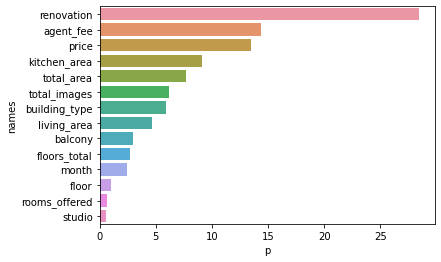

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(data[num_features+cat_features], data['exposition_time'], test_size=0.3, shuffle=False)

cat_regr1 = catboost.CatBoostRegressor(random_state=0, n_estimators=300, eta=0.05,
                                       max_depth=5, cat_features=cat_features)
cat_regr1.fit(X_train, y_train)
pred1 = cat_regr1.predict(X_test)
pred1_train = cat_regr1.predict(X_train)
cat_mae1 = mean_absolute_error(y_test, pred1)
print(round(cat_mae1, 4))  # 40.5995
features_imp = pd.DataFrame({"p": cat_regr1.feature_importances_, "names": cat_regr1.feature_names_})
sns.barplot(x='p', y='names', data=features_imp.sort_values('p', ascending=False))
plt.show()

mae_test = round(cat_mae1, 4)

__Задание 4.__

Реализуйте блендинг (получение ответов нескольких моделей и взятие их с весами (их нужно подбирать на обучающей выборке)) полученных в заданиях 2 и 3 моделей и выведите MAE на тестовой выборке. Ответ также округлите до 4 знаков после запятой.

Обратите внимание: в этом задании нет ограничений на веса у моделей.

In [6]:
# Лучшая модель из задания 2
X_train, X_test, y_train, y_test = train_test_split(data[num_features], data['exposition_time'], test_size=0.3, shuffle=False)

cat_regr = catboost.CatBoostRegressor(random_state=0, n_estimators=300, eta=0.05, max_depth=5)
cat_regr.fit(X_train, y_train)

pred_train = cat_regr.predict(X_train)
pred = cat_regr.predict(X_test)

def select_weights(y_true, y_pred_1, y_pred_2):
    metric = []
    grid = np.linspace(0, 1, 1000)
    for w_0 in grid:
      w_1 = 1 - w_0
      y = y_pred_1 * w_0 + y_pred_2 * w_1
      metric.append([mean_absolute_error(y_true, y), w_0, w_1])
    return metric


blending_train, w_0, w_1 = min(select_weights(y_train, pred1_train, pred_train), key=lambda x: x[0])
print(mean_absolute_error(y_test, pred1 * w_0 + pred * w_1))  # 40.5366


0:	learn: 76.1201582	total: 4.12ms	remaining: 1.23s
1:	learn: 76.0038851	total: 7.97ms	remaining: 1.19s
2:	learn: 75.9046542	total: 11.7ms	remaining: 1.16s
3:	learn: 75.8078042	total: 15.9ms	remaining: 1.17s
4:	learn: 75.7201146	total: 19.4ms	remaining: 1.14s
5:	learn: 75.6387551	total: 23.4ms	remaining: 1.15s
6:	learn: 75.5715496	total: 27.3ms	remaining: 1.14s
7:	learn: 75.5098987	total: 32ms	remaining: 1.17s
8:	learn: 75.4483800	total: 36.1ms	remaining: 1.17s
9:	learn: 75.3924271	total: 40.5ms	remaining: 1.18s
10:	learn: 75.3442785	total: 44.9ms	remaining: 1.18s
11:	learn: 75.2946511	total: 49.1ms	remaining: 1.18s
12:	learn: 75.2488858	total: 53.5ms	remaining: 1.18s
13:	learn: 75.2060217	total: 57.4ms	remaining: 1.17s
14:	learn: 75.1705735	total: 61.5ms	remaining: 1.17s
15:	learn: 75.1315924	total: 66.6ms	remaining: 1.18s
16:	learn: 75.0962451	total: 70.4ms	remaining: 1.17s
17:	learn: 75.0619065	total: 74.3ms	remaining: 1.16s
18:	learn: 75.0350856	total: 78.6ms	remaining: 1.16s
19:	l

In [7]:
mae_test2 = round(mean_absolute_error(y_test, pred1 * w_0 + pred * w_1), 4)


__Задание 5.__

В задании 3 вы подобрали гиперпараметры для CatBoost на всех признаках. Визуализируйте их важности в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

На основе важности признаков модели из задания 3 удалите неважные признаки (значения **менее 5**; обычно по bar-plot хорошо видно порог, с которого начинается хвост неважных признаков) и обучите модель с теми же параметрами(из задания 3) на оставшихся признаках. Посчитайте значение MAE на тестовой выборке, округлите его до 4 знаков после запятой. 

Сделайте выводы!


In [8]:
new_features_list = ['agent_fee', 'kitchen_area', 'price', 'total_area', 'total_images', 'building_type', 'renovation']
new_cat_features = ['building_type', 'renovation']

X_train, X_test, y_train, y_test = train_test_split(data[new_features_list], data['exposition_time'], test_size=0.3, shuffle=False)

cat_regr2 = catboost.CatBoostRegressor(random_state=0, n_estimators=300, eta=0.05,
                                       max_depth=5, cat_features=new_cat_features)
cat_regr2.fit(X_train, y_train)
pred2 = cat_regr2.predict(X_test)
pred2_train = cat_regr2.predict(X_train)
cat_mae2 = mean_absolute_error(y_test, pred2)
print(cat_mae2)  # 40.1773

0:	learn: 76.0534122	total: 23.6ms	remaining: 7.07s
1:	learn: 75.9208833	total: 77.2ms	remaining: 11.5s
2:	learn: 75.7875219	total: 101ms	remaining: 10s
3:	learn: 75.6506300	total: 126ms	remaining: 9.3s
4:	learn: 75.5023802	total: 149ms	remaining: 8.79s
5:	learn: 75.3900353	total: 170ms	remaining: 8.35s
6:	learn: 75.2773832	total: 191ms	remaining: 8.01s
7:	learn: 75.1713055	total: 213ms	remaining: 7.77s
8:	learn: 75.0620176	total: 234ms	remaining: 7.57s
9:	learn: 74.9738494	total: 255ms	remaining: 7.39s
10:	learn: 74.8877070	total: 275ms	remaining: 7.23s
11:	learn: 74.8101140	total: 297ms	remaining: 7.13s
12:	learn: 74.7249670	total: 316ms	remaining: 6.97s
13:	learn: 74.6518009	total: 349ms	remaining: 7.14s
14:	learn: 74.5852995	total: 371ms	remaining: 7.04s
15:	learn: 74.5240015	total: 391ms	remaining: 6.94s
16:	learn: 74.4743663	total: 411ms	remaining: 6.84s
17:	learn: 74.4066180	total: 435ms	remaining: 6.82s
18:	learn: 74.3645166	total: 457ms	remaining: 6.75s
19:	learn: 74.3213895	t

In [9]:
answer = round(cat_mae2, 4) # значение MAE на тестовой выборке после обучения на новом наборе признаков


Подумайте, почему могли получиться такие интересные резульаты!

Напоминаем: те части кода, которые выполнялись более 30 секунд оставьте закомментированными, только с ответом в переменной.